# Desafío - Regresión Lineal

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

1. Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un
cilindro.

In [ ]:
# Cargar el archivo CSV
file_path = '/content/Fish.csv'  # Reemplazar con la ruta correcta del archivo si es necesario
data = pd.read_csv(file_path)

# Verificar los datos cargados
print(data.head())

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


In [ ]:
# Calcular el volumen del pez
# Radio = Width / 2
# Altura = Height
data['Volume'] = np.pi * (data['Width'] / 2) ** 2 * data['Height']

# Mostrar las primeras filas del dataframe actualizado
print(data.head())

  Species  Weight  Length1  Length2  Length3   Height   Width      Volume
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200  146.215854
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056  181.707071
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961  214.391723
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555  198.477454
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340  257.609344


2. Verifica la correlación posible entre las variables, numérica y gráficamente.

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Verificar la correlación entre las variables numéricas
correlation_matrix = numeric_data.corr()
print("Matriz de correlación:")
print(correlation_matrix)

# Seleccionar solo las columnas numéricas
numeric_data = data.select_dtypes(include=[np.number])

# Verificar la correlación entre las variables numéricas
correlation_matrix = numeric_data.corr()
print("Matriz de correlación:")
print(correlation_matrix)
plt.show()


Matriz de correlación:
           Weight   Length1   Length2   Length3    Height     Width    Volume
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507  0.881981
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050  0.732409
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547  0.741313
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520  0.767774
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881  0.868256
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000  0.905626
Volume   0.881981  0.732409  0.741313  0.767774  0.868256  0.905626  1.000000
Matriz de correlación:
           Weight   Length1   Length2   Length3    Height     Width    Volume
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507  0.881981
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050  0.732409
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547  0.741313
Length3  0.923044 

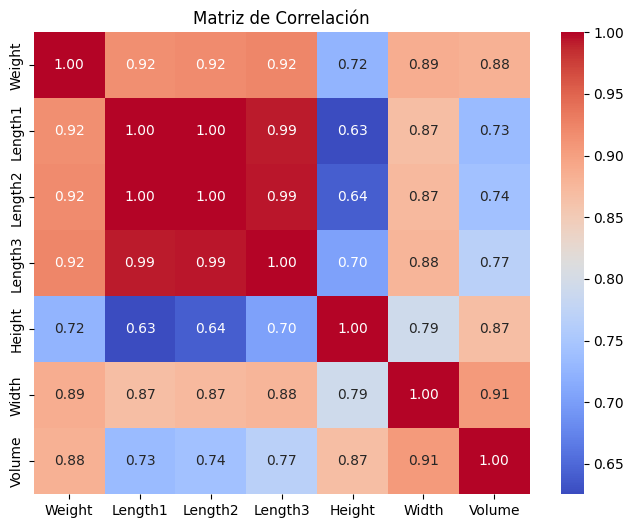

In [ ]:
# Graficar la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

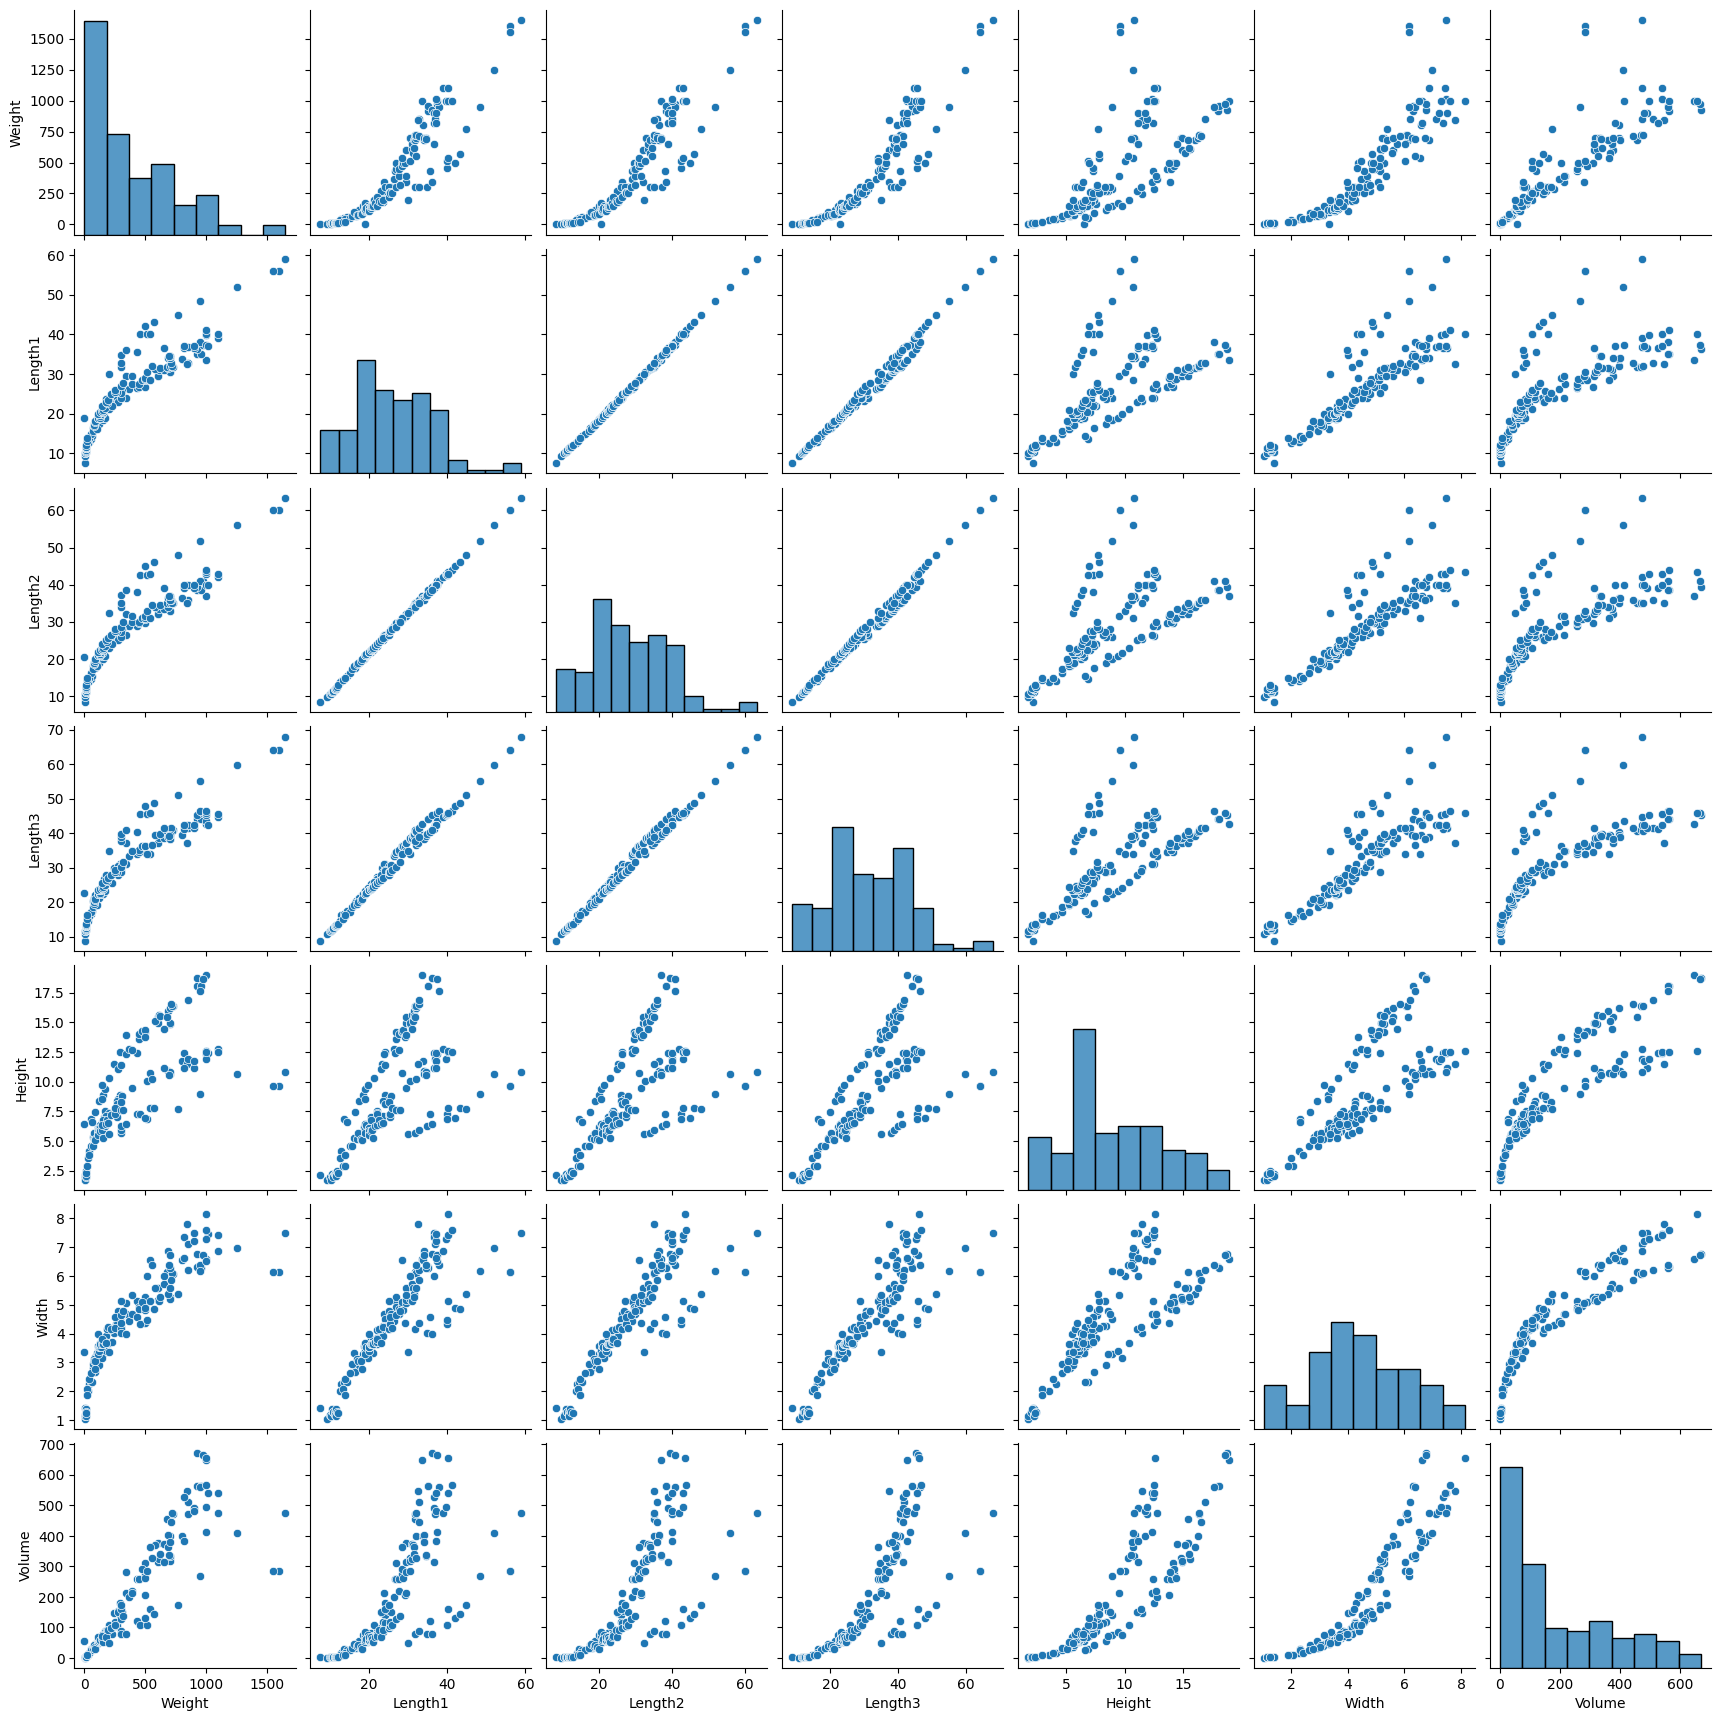

In [ ]:
sns.pairplot(data)

en la matriz se puede observar correlaciones entre peso y las longitudes, la altura, el ancho y el volumen. Ademas se observan correlaciones entre volumen y altura, volumen y ancho, ancho y peso.

3. Construye un modelo de regresión lineal que relacione el volumen y el peso de los
peces. Realiza una breve evaluación del modelo y grafícalo.

Error cuadrático medio (MSE): 16163.84
Coeficiente de determinación (R^2): 0.89


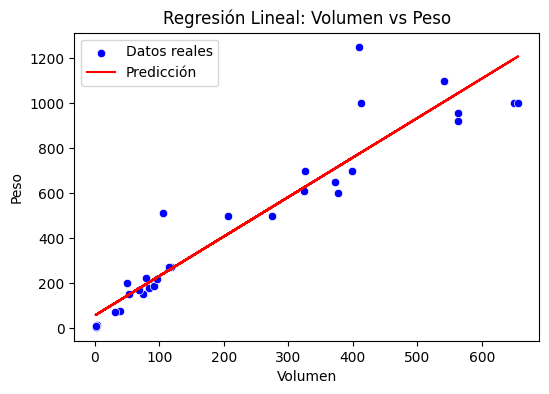

In [ ]:
# Modelo de regresión lineal: Volumen vs Peso
X = data[['Volume']]  # Variable independiente
y = data['Weight']  # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R^2): {r2:.2f}")

# Visualización del modelo
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_test['Volume'], y=y_test, label='Datos reales', color='blue')
plt.plot(X_test['Volume'], y_pred, label='Predicción', color='red')
plt.title('Regresión Lineal: Volumen vs Peso')
plt.xlabel('Volumen')
plt.ylabel('Peso')
plt.legend()
plt.show()

4. ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces?
Explica.

Especie: Bream
  MSE: 5269.55
  R^2: 0.84


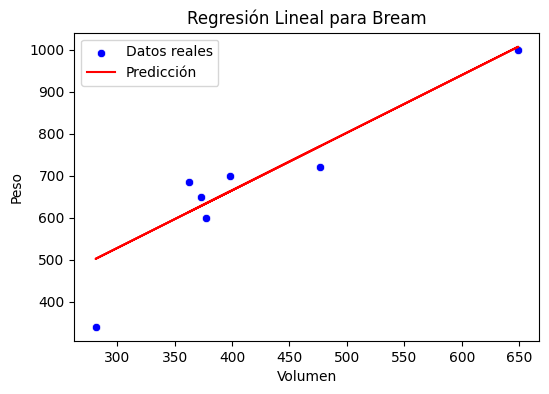

Especie: Roach
  MSE: 221.53
  R^2: 0.98


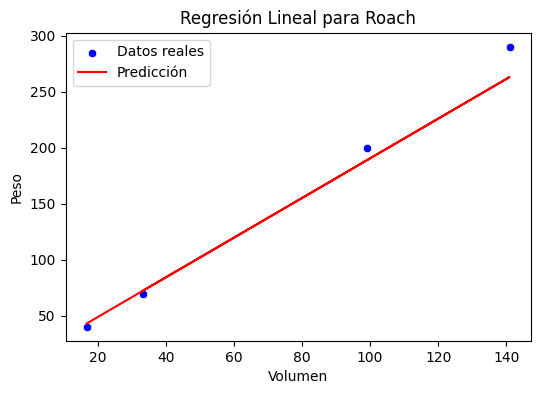

Especie: Whitefish
  MSE: 5541.42
  R^2: 0.00


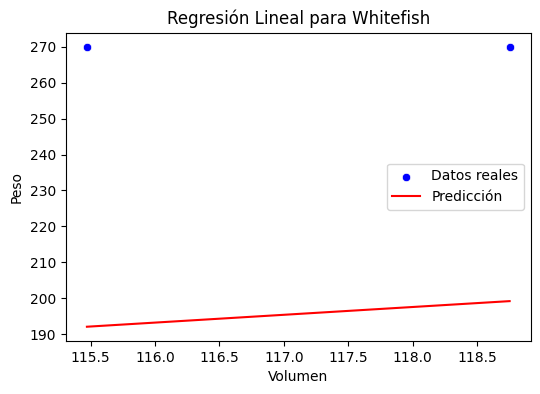

Especie: Parkki
  MSE: 57.28
  R^2: 0.99


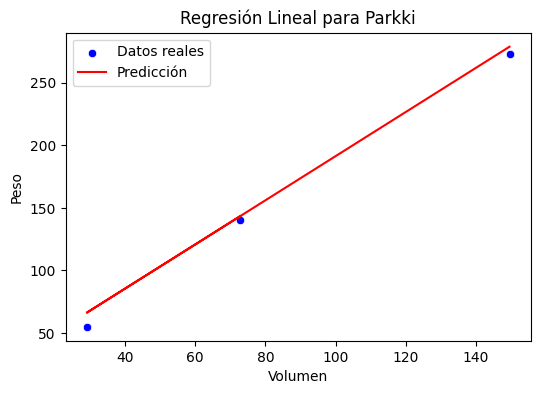

Especie: Perch
  MSE: 4747.57
  R^2: 0.96


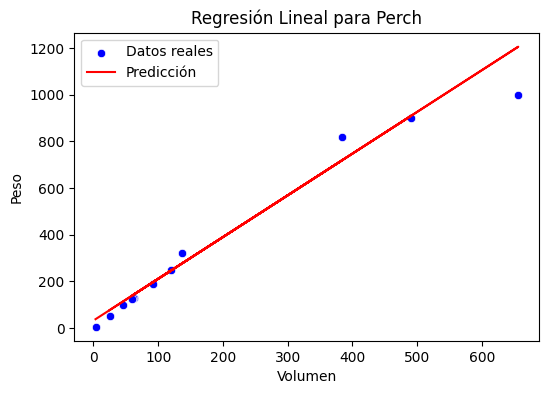

Especie: Pike
  MSE: 62308.96
  R^2: 0.80


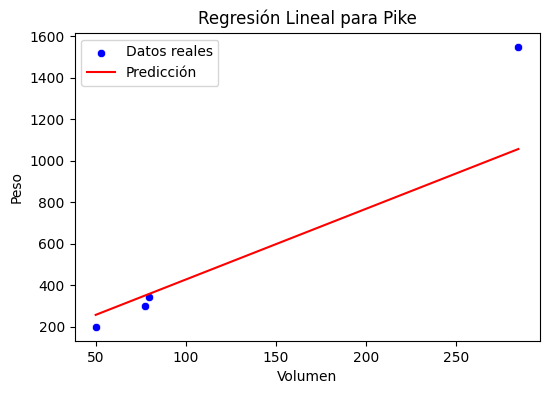

Especie: Smelt
  MSE: 2.98
  R^2: 0.56


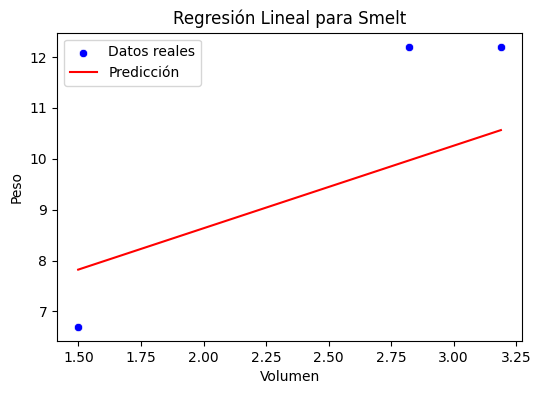

In [ ]:
# Aplicar el modelo por especie
species = data['Species'].unique()

for specie in species:
    print(f"Especie: {specie}")

    # Filtrar los datos por especie
    species_data = data[data['Species'] == specie]

    # Variables independientes y dependientes
    X = species_data[['Volume']]
    y = species_data['Weight']

    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predicciones y evaluación
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"  MSE: {mse:.2f}")
    print(f"  R^2: {r2:.2f}")

    # Visualización
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_test['Volume'], y=y_test, label='Datos reales', color='blue')
    plt.plot(X_test['Volume'], y_pred, label='Predicción', color='red')
    plt.title(f'Regresión Lineal para {specie}')
    plt.xlabel('Volumen')
    plt.ylabel('Peso')
    plt.legend()
    plt.show()

Los peces de distintas especies tienen diferentes relaciones entre sus dimensiones y el peso. Esto significa que los coeficientes de regresión para cada especie podrían variar significativamente.
Al aplicar el modelo general a todas las especies juntas, la relación entre volumen y peso se diluye debido a la mezcla de patrones entre especies.
Al entrenar el modelo por especie, capturas mejor las características específicas de cada grupo, lo que probablemente mejore el ajuste del modelo
Es posible que algunas especies presenten una correlación más fuerte entre el volumen y el peso, mientras que otras no. Esto puede reflejarse en el error cuadrático medio (MSE) y el coeficiente de determinación.

5. Construye un modelo de regresión que relacione dos o más variables con el peso de
los peces. Realiza una breve evaluación del modelo.

Modelo Multivariable - Error cuadrático medio (MSE): 5329.84
Modelo Multivariable - Coeficiente de determinación (R^2): 0.96


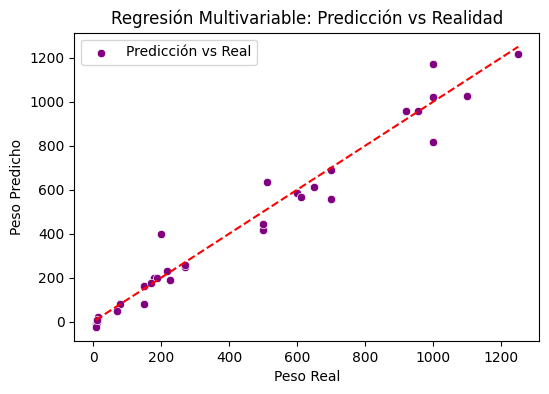

In [ ]:
# Modelo de regresión multivariable: Longitudes, Altura, Ancho y Volumen vs Peso
features = ['Length1', 'Length2', 'Length3', 'Height', 'Width', 'Volume']
X_multi = data[features]  # Variables independientes
y_multi = data['Weight']  # Variable dependiente

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Crear y entrenar el modelo multivariable
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Predicciones
multi_y_pred = multi_model.predict(X_test_multi)

# Evaluación del modelo multivariable
multi_mse = mean_squared_error(y_test_multi, multi_y_pred)
multi_r2 = r2_score(y_test_multi, multi_y_pred)
print(f"Modelo Multivariable - Error cuadrático medio (MSE): {multi_mse:.2f}")
print(f"Modelo Multivariable - Coeficiente de determinación (R^2): {multi_r2:.2f}")

# Visualización de resultados del modelo multivariable
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test_multi, y=multi_y_pred, label='Predicción vs Real', color='purple')
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], color='red', linestyle='--')
plt.title('Regresión Multivariable: Predicción vs Realidad')
plt.xlabel('Peso Real')
plt.ylabel('Peso Predicho')
plt.legend()
plt.show()


El MSE de 5329.84 indica que el promedio del error cuadrático en las predicciones es moderado. Aunque un valor más bajo sería ideal, este error es razonable considerando la magnitud de las variables involucradas. Con un R2
de 0.96, el modelo explica el 96% de la variabilidad en el peso de los peces usando las variables independientes seleccionadas (longitudes, altura, ancho y volumen). Esto sugiere un ajuste muy fuerte entre las variables y el peso del pez. En conclusión el modelo multivariable es robusto y tiene un alto poder predictivo, reflejado por su R2 elevado. Sin embargo, el MSE aún puede optimizarse, posiblemente ajustando las características o explorando técnicas como regularización o modelos más avanzados.